# Artificial Neural Network

### Import  libraries

In [336]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing

### Import the dataset

In [337]:
# put all the data into one dataframe
dataset = pd.concat(map(pd.read_csv, ['gt_2011.csv', 'gt_2012.csv','gt_2013.csv']))
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

#### List of Acronyms

Ambient temperature (AT): C <br>
Ambient pressure (AP): mbar <br>
Ambient humidity (AH): (%)<br>
Air filter difference pressure (AFDP): mbar<br>
Gas turbine exhaust pressure (GTEP): mbar<br>
Turbine inlet temperature (TIT): C<br>
Turbine after temperature (TAT): C<br>
Compressor discharge pressure (CDP): mbar<br>
Turbine energy yield (TEY): MWH<br>
Carbon monoxide (CO): mg/m3<br>
Nitrogen oxides (NOx): mg/m3 - target variable

In [338]:
print(dataset.columns)

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')


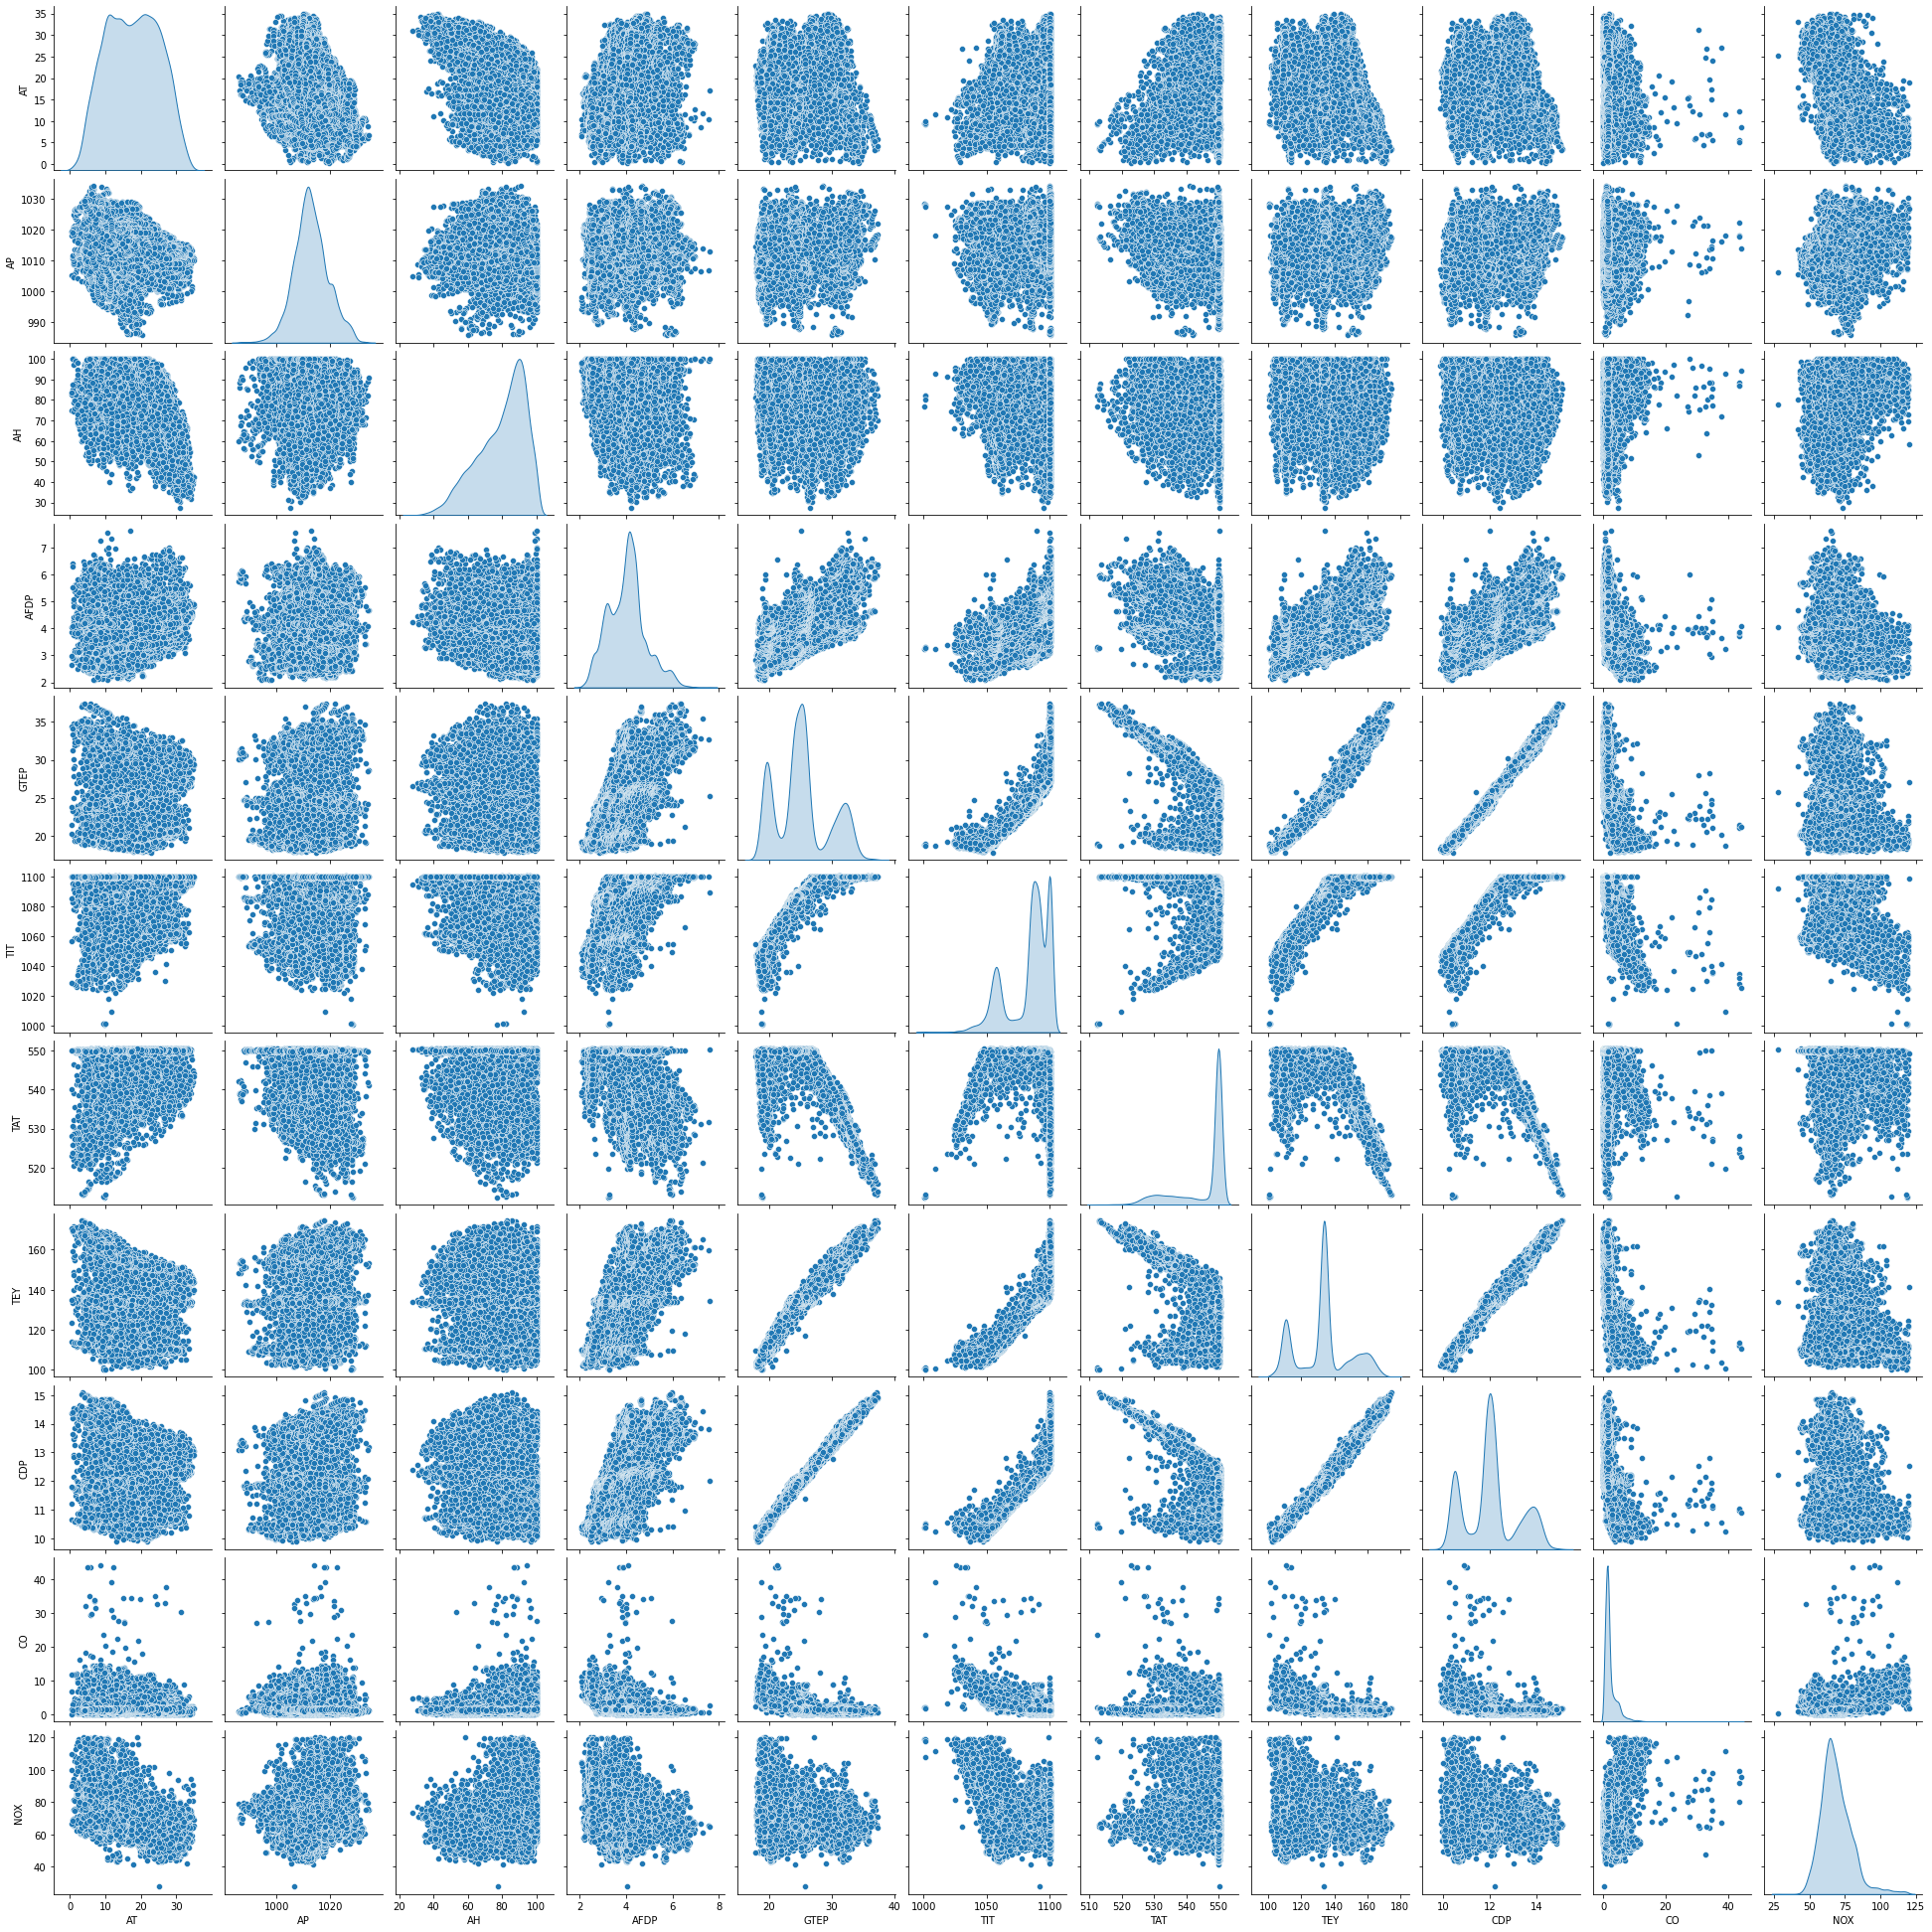

In [339]:
# inspect the data
sns.pairplot(dataset, diag_kind='kde')

### Splitt the dataset into the Training set and Test set

In [340]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [341]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Build and train ANN

### Initialize the ANN

In [342]:
ann = tf.keras.models.Sequential()

### Add layers

In [343]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
# add output layer with one node and linear activation function since target variable is unbounded
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

### Compile the ANN

In [344]:
ann.compile(optimizer = 'adam', loss = 'mean_absolute_error')

### Train the ANN on the Training set

In [345]:
history = ann.fit(X_train, y_train, batch_size = 64, epochs = 150,verbose = 1)

Epoch 1/150
278/278 [==============================] - 0s 509us/step - loss: 52.1189
Epoch 2/150
278/278 [==============================] - 0s 488us/step - loss: 11.2521
Epoch 3/150
278/278 [==============================] - 0s 487us/step - loss: 6.6991
Epoch 4/150
278/278 [==============================] - 0s 489us/step - loss: 5.1242
Epoch 5/150
278/278 [==============================] - 0s 477us/step - loss: 4.5355
Epoch 6/150
278/278 [==============================] - 0s 478us/step - loss: 4.2853
Epoch 7/150
278/278 [==============================] - 0s 465us/step - loss: 4.1187
Epoch 8/150
278/278 [==============================] - 0s 496us/step - loss: 3.9835
Epoch 9/150
278/278 [==============================] - 0s 474us/step - loss: 3.8912
Epoch 10/150
278/278 [==============================] - 0s 494us/step - loss: 3.7960
Epoch 11/150
278/278 [==============================] - 0s 544us/step - loss: 3.7093
Epoch 12/150
278/278 [==============================] - 0s 488us/step - 

278/278 [==============================] - 0s 491us/step - loss: 3.0413
Epoch 98/150
278/278 [==============================] - 0s 484us/step - loss: 3.0399
Epoch 99/150
278/278 [==============================] - 0s 481us/step - loss: 3.0467
Epoch 100/150
278/278 [==============================] - 0s 478us/step - loss: 3.0429
Epoch 101/150
278/278 [==============================] - 0s 488us/step - loss: 3.0345
Epoch 102/150
278/278 [==============================] - 0s 488us/step - loss: 3.0413
Epoch 103/150
278/278 [==============================] - 0s 500us/step - loss: 3.0414
Epoch 104/150
278/278 [==============================] - 0s 502us/step - loss: 3.0359
Epoch 105/150
278/278 [==============================] - 0s 477us/step - loss: 3.0332
Epoch 106/150
278/278 [==============================] - 0s 513us/step - loss: 3.0372
Epoch 107/150
278/278 [==============================] - 0s 493us/step - loss: 3.0303
Epoch 108/150
278/278 [==============================] - 0s 472us/step

### Predict and analyze the test set results

In [346]:
y_pred = ann.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[75.43435669 84.229     ]
 [66.9193573  60.207     ]
 [63.15802765 69.206     ]
 ...
 [66.76107788 63.731     ]
 [59.87902069 60.365     ]
 [75.16623688 75.284     ]]


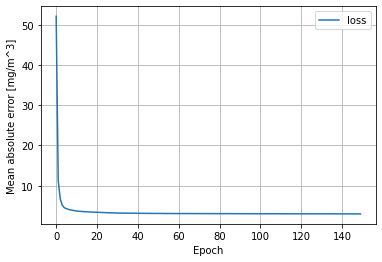

In [347]:
plt.plot(history.history['loss'], label='loss')
#plt.yscale("log")
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error [mg/m^3]')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 0, 'sorted samples')

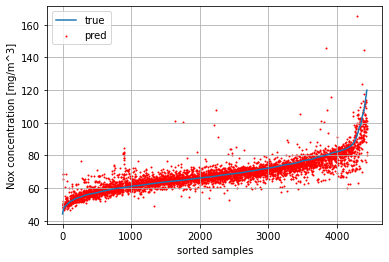

In [348]:
# check results visually by plotting sorted values
plt.plot(y_test[y_test.argsort()], label='true')
plt.scatter(np.arange(0,len(y_test)),y_pred[y_test.argsort()], label='pred',s = 1, c = 'r')
plt.grid(True)
plt.legend()
plt.ylabel('Nox concentration [mg/m^3]')
plt.xlabel('sorted samples')

Text(0.5, 0, 'Ambient temperature [C]')

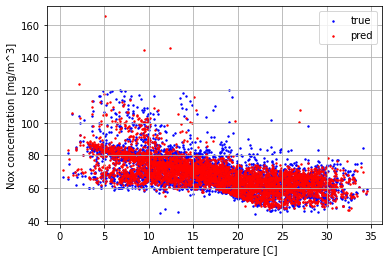

In [349]:
# check how prediction varies with  ambient temperature
plt.scatter(sc.inverse_transform(X_test)[:,0], y_test, label='true',s = 2, c = 'b')
plt.scatter(sc.inverse_transform(X_test)[:,0],y_pred, label='pred',s = 2, c = 'r')
plt.grid(True)
plt.legend()
plt.ylabel('Nox concentration [mg/m^3]')
plt.xlabel('Ambient temperature [C]')

Text(0.5, 0, 'Ambient pressure [mbar]')

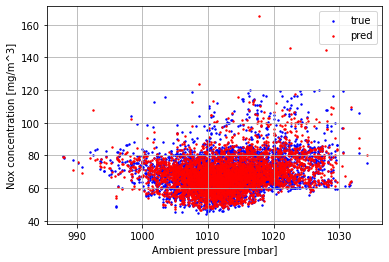

In [350]:
# check how prediction varies with  ambient pressure
plt.scatter(sc.inverse_transform(X_test)[:,1], y_test, label='true',s = 2, c = 'b')
plt.scatter(sc.inverse_transform(X_test)[:,1],y_pred, label='pred',s = 2, c = 'r')
plt.grid(True)
plt.legend()
plt.ylabel('Nox concentration [mg/m^3]')
plt.xlabel('Ambient pressure [mbar]')